In [1]:
import numpy as np
import matplotlib.pyplot as plt
from genetic_one import Gen1

In [2]:
def function_a(x):
    x=x[0]
    return x*x+3*x-5+np.sqrt(np.sqrt(x**2))+5*np.sin(x-5)*2*x

def rgb_from_x(x):
    return (np.sqrt((1-(function_a(x)/max_Y)*(function_a(x)/max_Y))**2),0.5, (function_a(x)/max_Y)*(function_a(x)/max_Y))

a = 50
X =[i for i in range(-a,a)]
Y =[function_a([x]) for x in X]
max_Y=max(Y)

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 5, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 1 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a]] # searching intervals for the solution

# Experiment
experiment = Gen1(function_a ,input_size, bounds, model_par)

gen_0 [[-36], [-17], [3], [28], [34]]


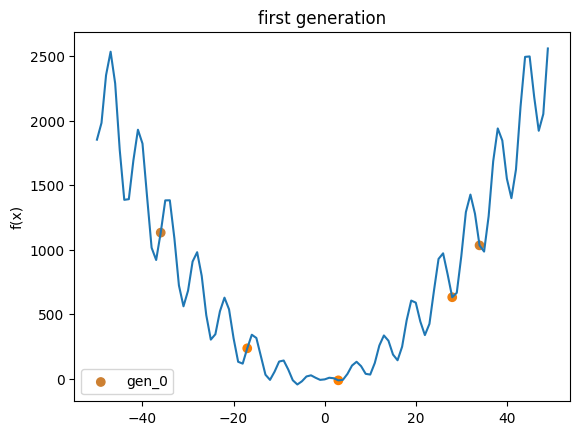

In [16]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

print("gen_0", gen_0)
plt.scatter(gen_0,[function_a(x) for x in gen_0] , c=[rgb_from_x(x) for x in gen_0], label='gen_0')
plt.plot(X,Y)
plt.title('first generation')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()

Epochs 0/5
Evolution process ended!
Last generation: [[10], [-12], [-12], [-12], [-12], [-12], [-12], [-35], [-35], [-35]]
Epochs 1/5
Evolution process ended!
Last generation: [[-16], [-2], [-2], [-2], [-12], [-12], [-12], [1], [1], [1]]
Epochs 2/5
Evolution process ended!
Last generation: [[-1], [-8], [-8], [-8], [-4], [-4], [-4], [-12], [-12], [-11]]
Epochs 3/5
Evolution process ended!
Last generation: [[-8], [-5], [-1], [-1], [-8], [-4], [-4], [-1], [-1], [3]]
Epochs 4/5
Evolution process ended!
Last generation: [[-6], [-6], [-6], [-6], [-6], [-6], [-6], [-5], [-5], [-5]]


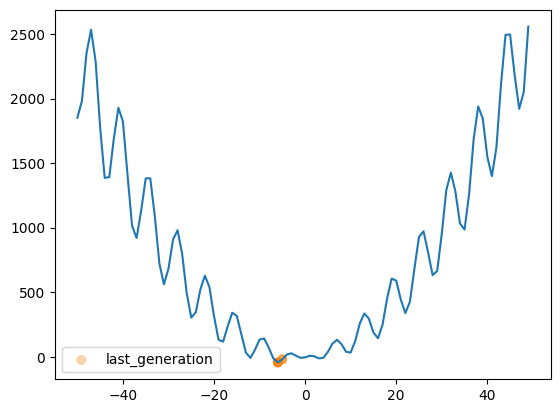

In [13]:
## Automate evolution

nr_epochs = 5
last_generation, history= experiment.evolve(nr_epochs,history=True)
fit = [function_a(x) for x in last_generation] 
plt.scatter(last_generation, fit , c=[rgb_from_x(x) for x in last_generation], label='last_generation', alpha=0.3)
plt.plot(X,Y)
plt.title('last generation')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()

NameError: name 'evolution' is not defined

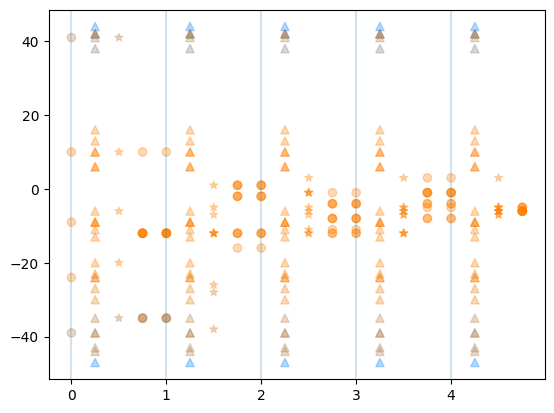

In [17]:
step=0.25
time = 0

for i in range(5):
    gen_0 = history[i]['gen_0']
    Y0=[time for _ in gen_0]
    colours =[rgb_from_x(x) for x in gen_0]
    time=time+step
    if i==0:
        plt.scatter(Y0,gen_0, c=colours, label='generation_0', alpha=0.3)
    else:
        plt.scatter(Y0,gen_0, c=colours, alpha=0.3)
        
    cf = history[0]['clone_family']
    clone_family =[]
    for f in cf:
        for c in f:
            clone_family.append(c)

    Y0=[time for _ in clone_family]
    colours =[rgb_from_x(x)  for x in clone_family]
    time=time+step
    if i==0:
        plt.scatter(Y0,clone_family, c=colours, label='clone',marker='^', alpha=0.3)
    else:
        plt.scatter(Y0,clone_family, c=colours,marker='^', alpha=0.3)
        
    survivours= history[i]['generation']
    Y0=[time for _ in survivours]
    colours =[rgb_from_x(x)  for x in survivours]
    time=time+step
    if i==0:
        plt.scatter(Y0,survivours, c=colours, label='survivours',marker='*', alpha=0.3)
    else:
        plt.scatter(Y0,survivours, c=colours,marker='*', alpha=0.3)

    new_generation= history[i]['new_generation']
    Y0=[time for _ in new_generation]
    colours =[rgb_from_x(x)  for x in new_generation]
    time=time+step
    if i==0:
        plt.scatter(Y0,new_generation, c=colours, label='new_generation',marker='o', alpha=0.3)
    else:
        plt.scatter(Y0,new_generation, c=colours,marker='o', alpha=0.3)



    plt.axvline(x=i,alpha =0.2)

plt.title(evolution)
plt.ylabel('x')
plt.xlabel('time')
plt.legend()

In [7]:
## gradient based method


In [8]:
# https://www.geeksforgeeks.org/intuition-of-adam-optimizer/
#https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc